<a href="https://colab.research.google.com/github/Javad1942/Group-2-QBC8/blob/Classification%2FMojtaba-Diana/HBN_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer

In [ ]:
%cd /content/drive/My Drive/bootcamp_project

/content/drive/.shortcut-targets-by-id/1XGS6I_vI23LBKkFLHiNCIiAQUVOr_p2k/bootcamp_project


In [ ]:
!ls

 classification-step1	    final1-data.csv	     khoroji2.csv
 complete.ipynb		    final-HBN.ipynb	     khoroji.csv
'data_dictionary (2).csv'   final_HBN_MOhammad.csv  'model_(1)_(1) (1).ipynb'
 dataset_for_model.csv	    HBN.csv		    'model_(1) (1).ipynb'
 dataset_mohammad.csv	    hbn_dataset.csv	     model.ipynb
 df_HBN_0.csv		    hbn_dataset_final.csv    Parquet.ipynb
 df_HBN_clean.ipynb	    HBN.ipynb		     series_parquet
 feature.ipynb		    HBN_second		     series.parquet.zip


In [ ]:
hbn_path = 'HBN.csv'
hbn_data = pd.read_csv(hbn_path)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  محاسبه تعداد missing values ستون sii تصمیم برای مدیریت یا حذف missing values
</p>

In [ ]:
print(f"Initial number of rows: {hbn_data.shape[0]}")

Initial number of rows: 3960


In [ ]:
missing_values = hbn_data['sii'].isnull().sum()
missing_percentage = (missing_values / len(hbn_data)) * 100
print("\nMissing Values (Count):")
print(missing_values)
print("\nMissing Values (Percentage):")
print(missing_percentage)


Missing Values (Count):
1224

Missing Values (Percentage):
30.909090909090907


In [ ]:
# حذف سطرهایی که ستون sii مقدار گمشده دارند
hbn_data = hbn_data.dropna(subset=['sii'])
# بررسی تعداد سطرهای باقی‌مانده
print(f"Number of rows after removing missing 'sii': {hbn_data.shape[0]}")

Number of rows after removing missing 'sii': 2736


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  جداسازی ستون sii از سایر ستون ها برای ادامه کار رو ستون هایی به غیر از ستون sii که ستون target ما هست
</p>

In [ ]:
x = hbn_data.drop(columns=['sii'])
y = hbn_data['sii']

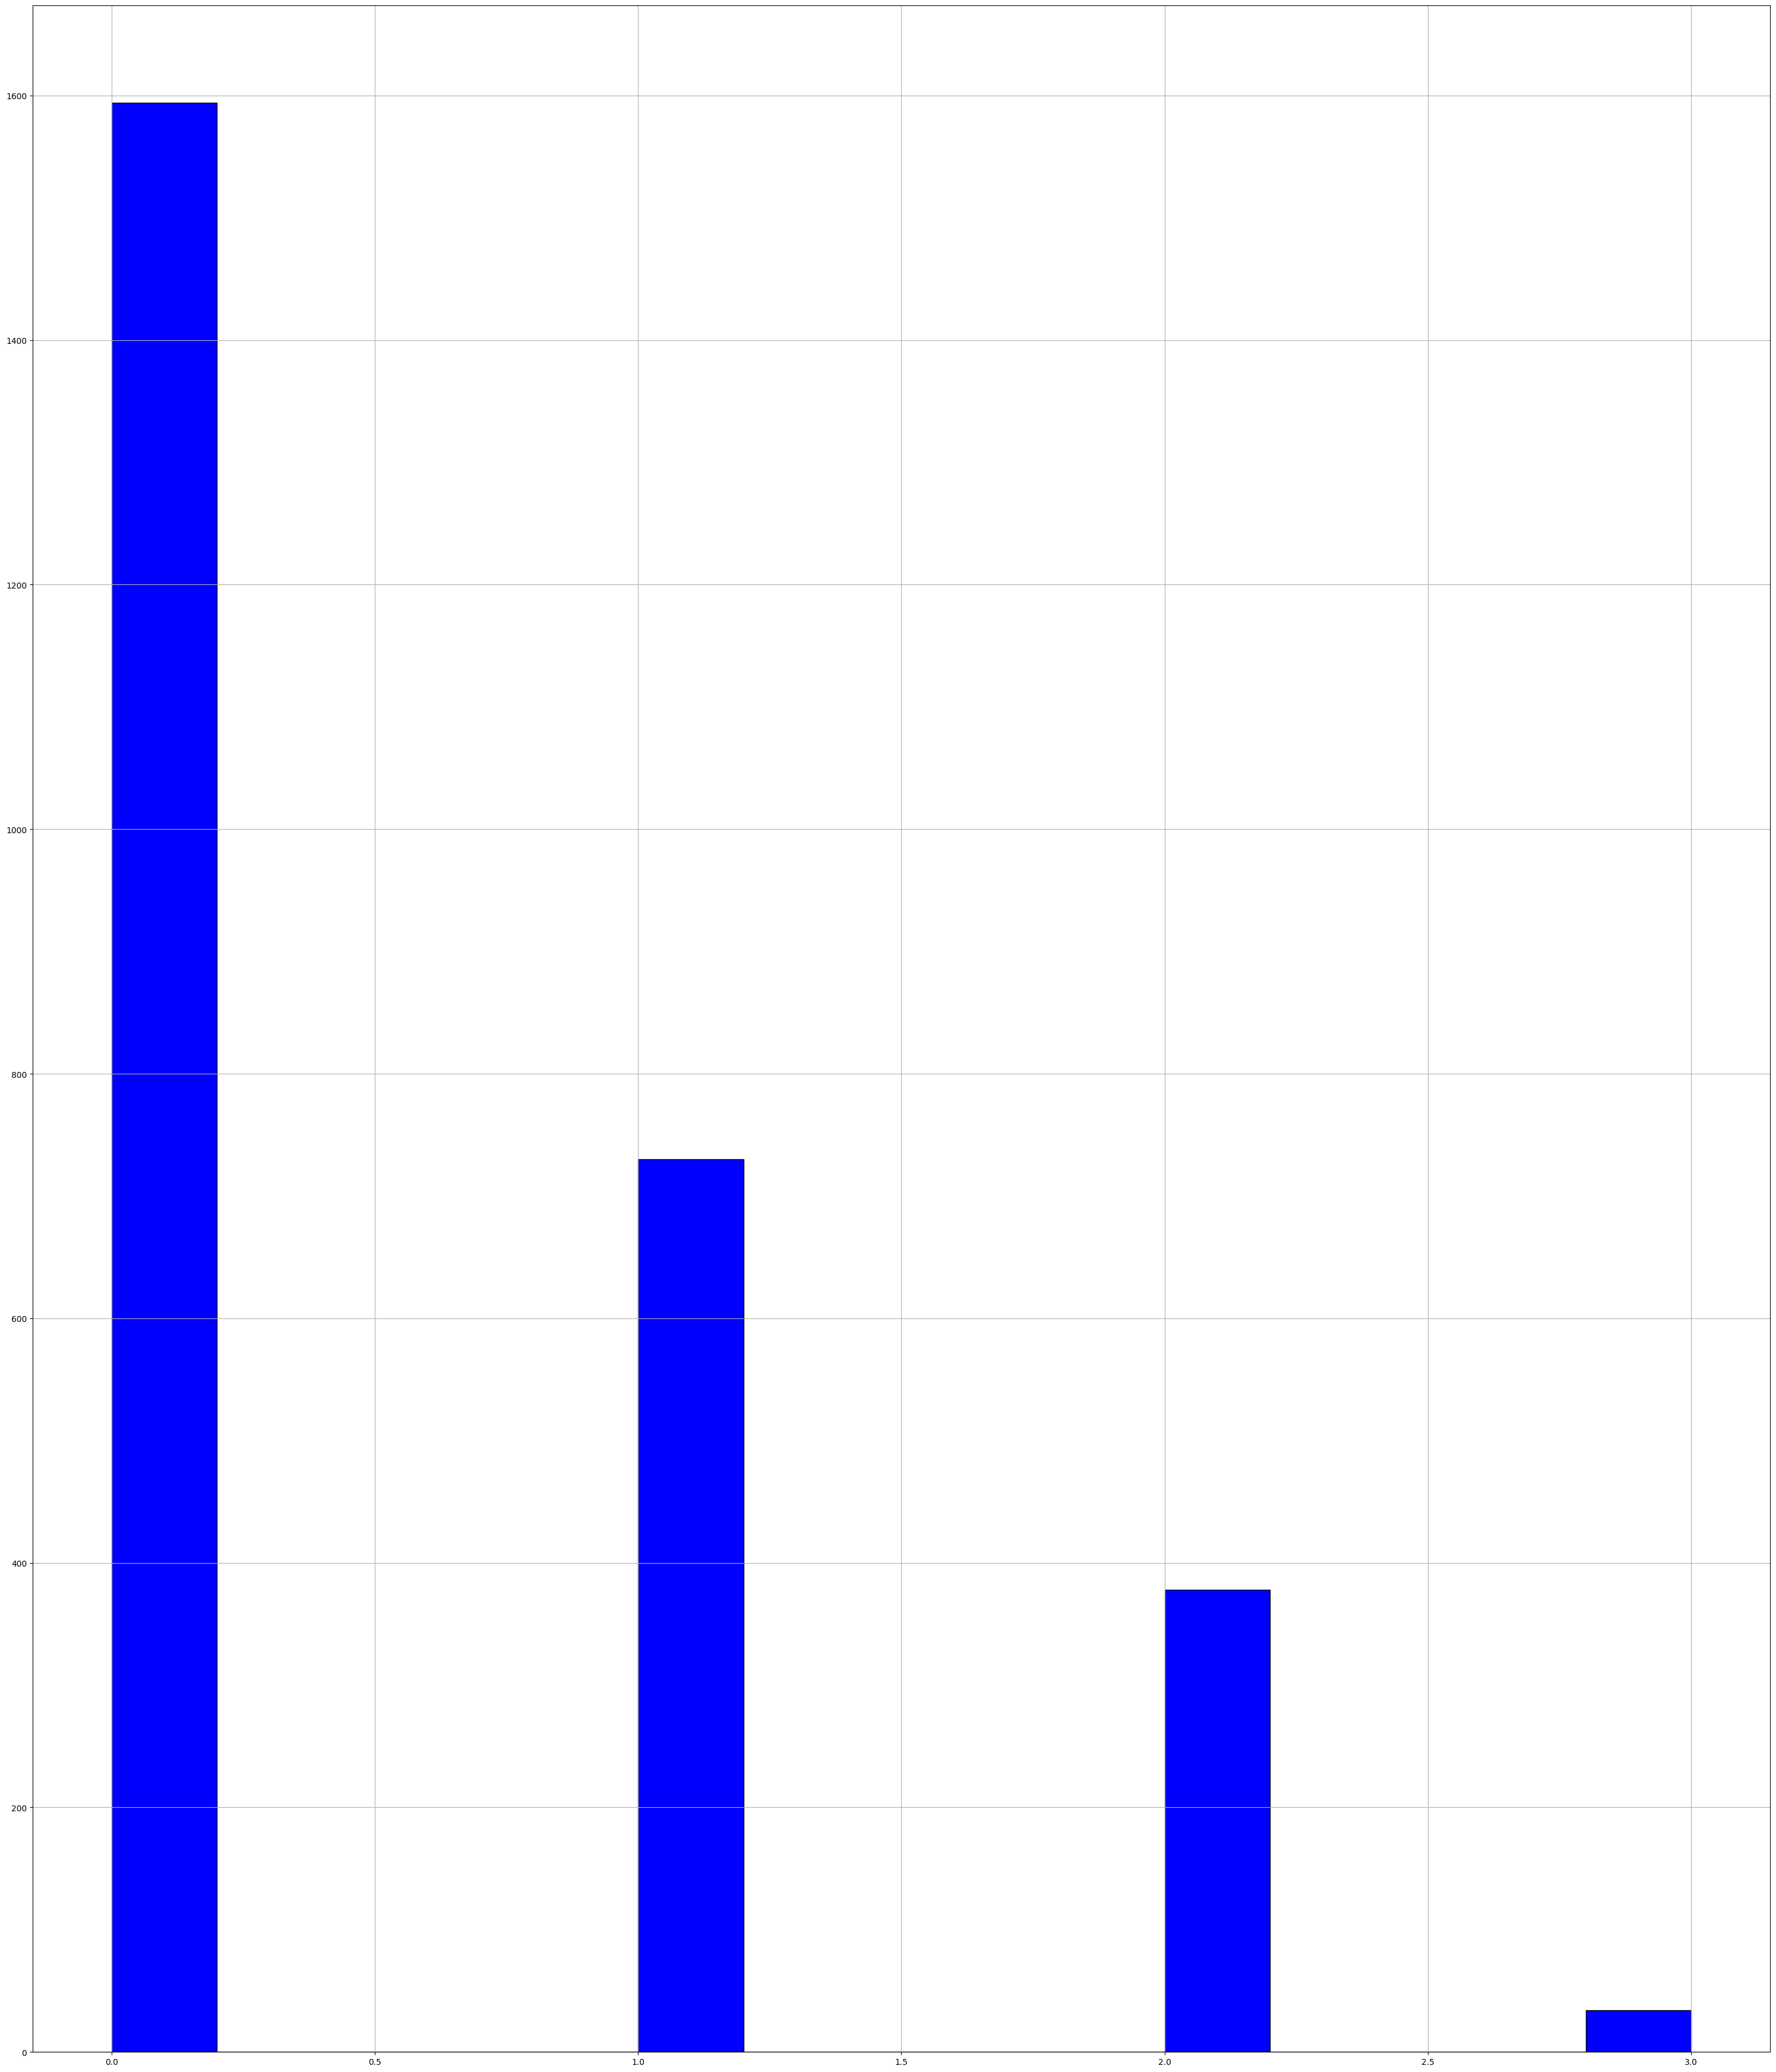

In [ ]:
y.hist(figsize=(30, 35), bins=15, color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  محاسبه missing values هر ستون
</p>

In [ ]:
missing_values = x.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(x)) * 100
print("\nMissing Values (Count):")
print(missing_values)
print("\nMissing Values (Percentage):")
print(missing_percentage)


Missing Values (Count):
PAQ_A-PAQ_A_Total               2373
PAQ_A-Season                    2373
Physical-Waist_Circumference    2253
FE-Time_Sec                     2008
FE-Time_Mins                    2008
                                ... 
id                                 0
Sex                                0
PCIAT-PCIAT_Total                  0
PCIAT-Season                       0
Unnamed: 0                         0
Length: 82, dtype: int64

Missing Values (Percentage):
PAQ_A-PAQ_A_Total               86.732456
PAQ_A-Season                    86.732456
Physical-Waist_Circumference    82.346491
FE-Time_Sec                     73.391813
FE-Time_Mins                    73.391813
                                  ...    
id                               0.000000
Sex                              0.000000
PCIAT-PCIAT_Total                0.000000
PCIAT-Season                     0.000000
Unnamed: 0                       0.000000
Length: 82, dtype: float64


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  حذف ستون هایی که بیش از 70 درصد آنها دارای missing values  است
</p>

In [ ]:
threshold = 0.7
x = x.dropna(thresh=int((1-threshold)*len(x)), axis=1)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  حذف ستون هایی که corrolation ضعیفی با sii دارند و بیشتر از 50% هم دارای missing values هستند
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
محاسبه corrolation های ستون ها با ستون "sii"
</p>


Correlation of numeric features with target (sii):
PCIAT-PCIAT_Total    0.899681
PCIAT-PCIAT_15       0.751399
PCIAT-PCIAT_18       0.731112
PCIAT-PCIAT_17       0.729867
PCIAT-PCIAT_05       0.722722
                       ...   
FGC-FGC_SRL         -0.049257
FGC-FGC_SRR_Zone    -0.068528
CGAS-Score          -0.085261
Sex                 -0.100148
FGC-FGC_SRL_Zone    -0.112497
Length: 65, dtype: float64


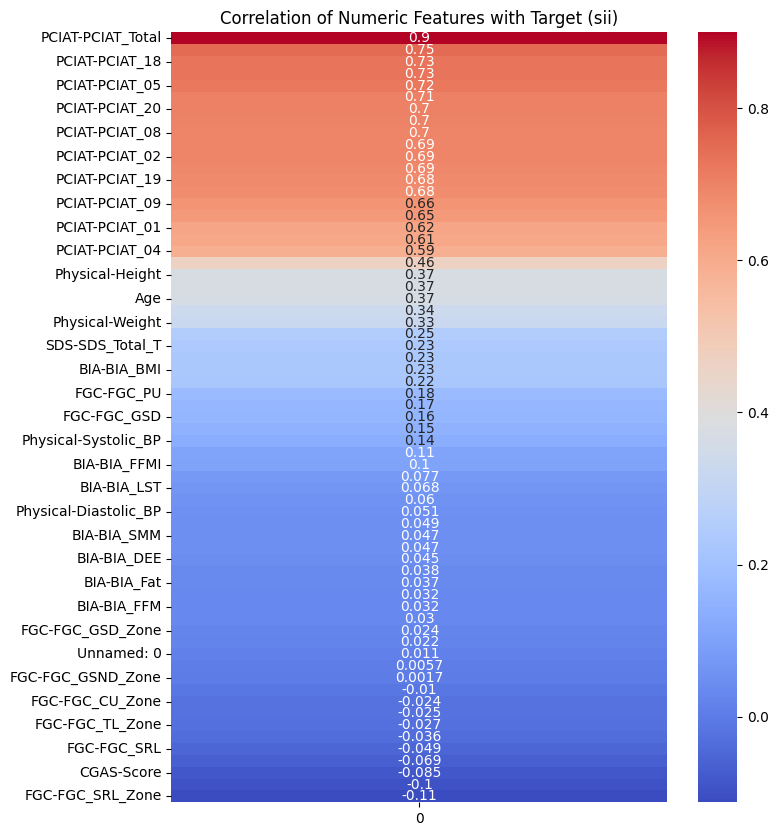

In [ ]:
# انتخاب ستون‌های عددی
numeric_columns = x.select_dtypes(include=['number']).columns

# محاسبه همبستگی با متغیر هدف
correlation_with_target = x[numeric_columns].corrwith(y)

print("\nCorrelation of numeric features with target (sii):")
print(correlation_with_target.sort_values(ascending=False))

plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_target.sort_values(ascending=False).to_frame(),
            annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation of Numeric Features with Target (sii)")
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
شناسایی ستونهایی با corrolation  < 0.1
</p>

In [ ]:
weak_correlation_columns = correlation_with_target[abs(correlation_with_target) < 0.1].index
print("\nColumns with weak correlation with sii (correlation < 0.1):")
print(weak_correlation_columns)


Columns with weak correlation with sii (correlation < 0.1):
Index(['Unnamed: 0', 'CGAS-Score', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num',
       'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW',
       'BIA-BIA_FFM', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW',
       'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW',
       'PAQ_C-PAQ_C_Total'],
      dtype='object')


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
شناسایی ستون هایی با بیشتر از 50 درصد missing values
</p>

In [ ]:
high_missing_columns = missing_percentage[missing_percentage > 50].index
print("\nColumns with more than 50% missing values:")
print(high_missing_columns)


Columns with more than 50% missing values:
Index(['PAQ_A-PAQ_A_Total', 'PAQ_A-Season', 'Physical-Waist_Circumference',
       'FE-Time_Sec', 'FE-Time_Mins', 'FE-Max_Stage', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSND', 'FE-Season'],
      dtype='object')


In [ ]:
columns_to_drop = list(set(high_missing_columns).intersection(set(weak_correlation_columns)))
print("\nColumns to be dropped (high missing + weak correlation):")
print(columns_to_drop)


Columns to be dropped (high missing + weak correlation):
['FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone']


In [ ]:
x = x.drop(columns=columns_to_drop)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  رسم توزیع فقط برای ستون‌هایی که مقدار گمشده دارند
</p>

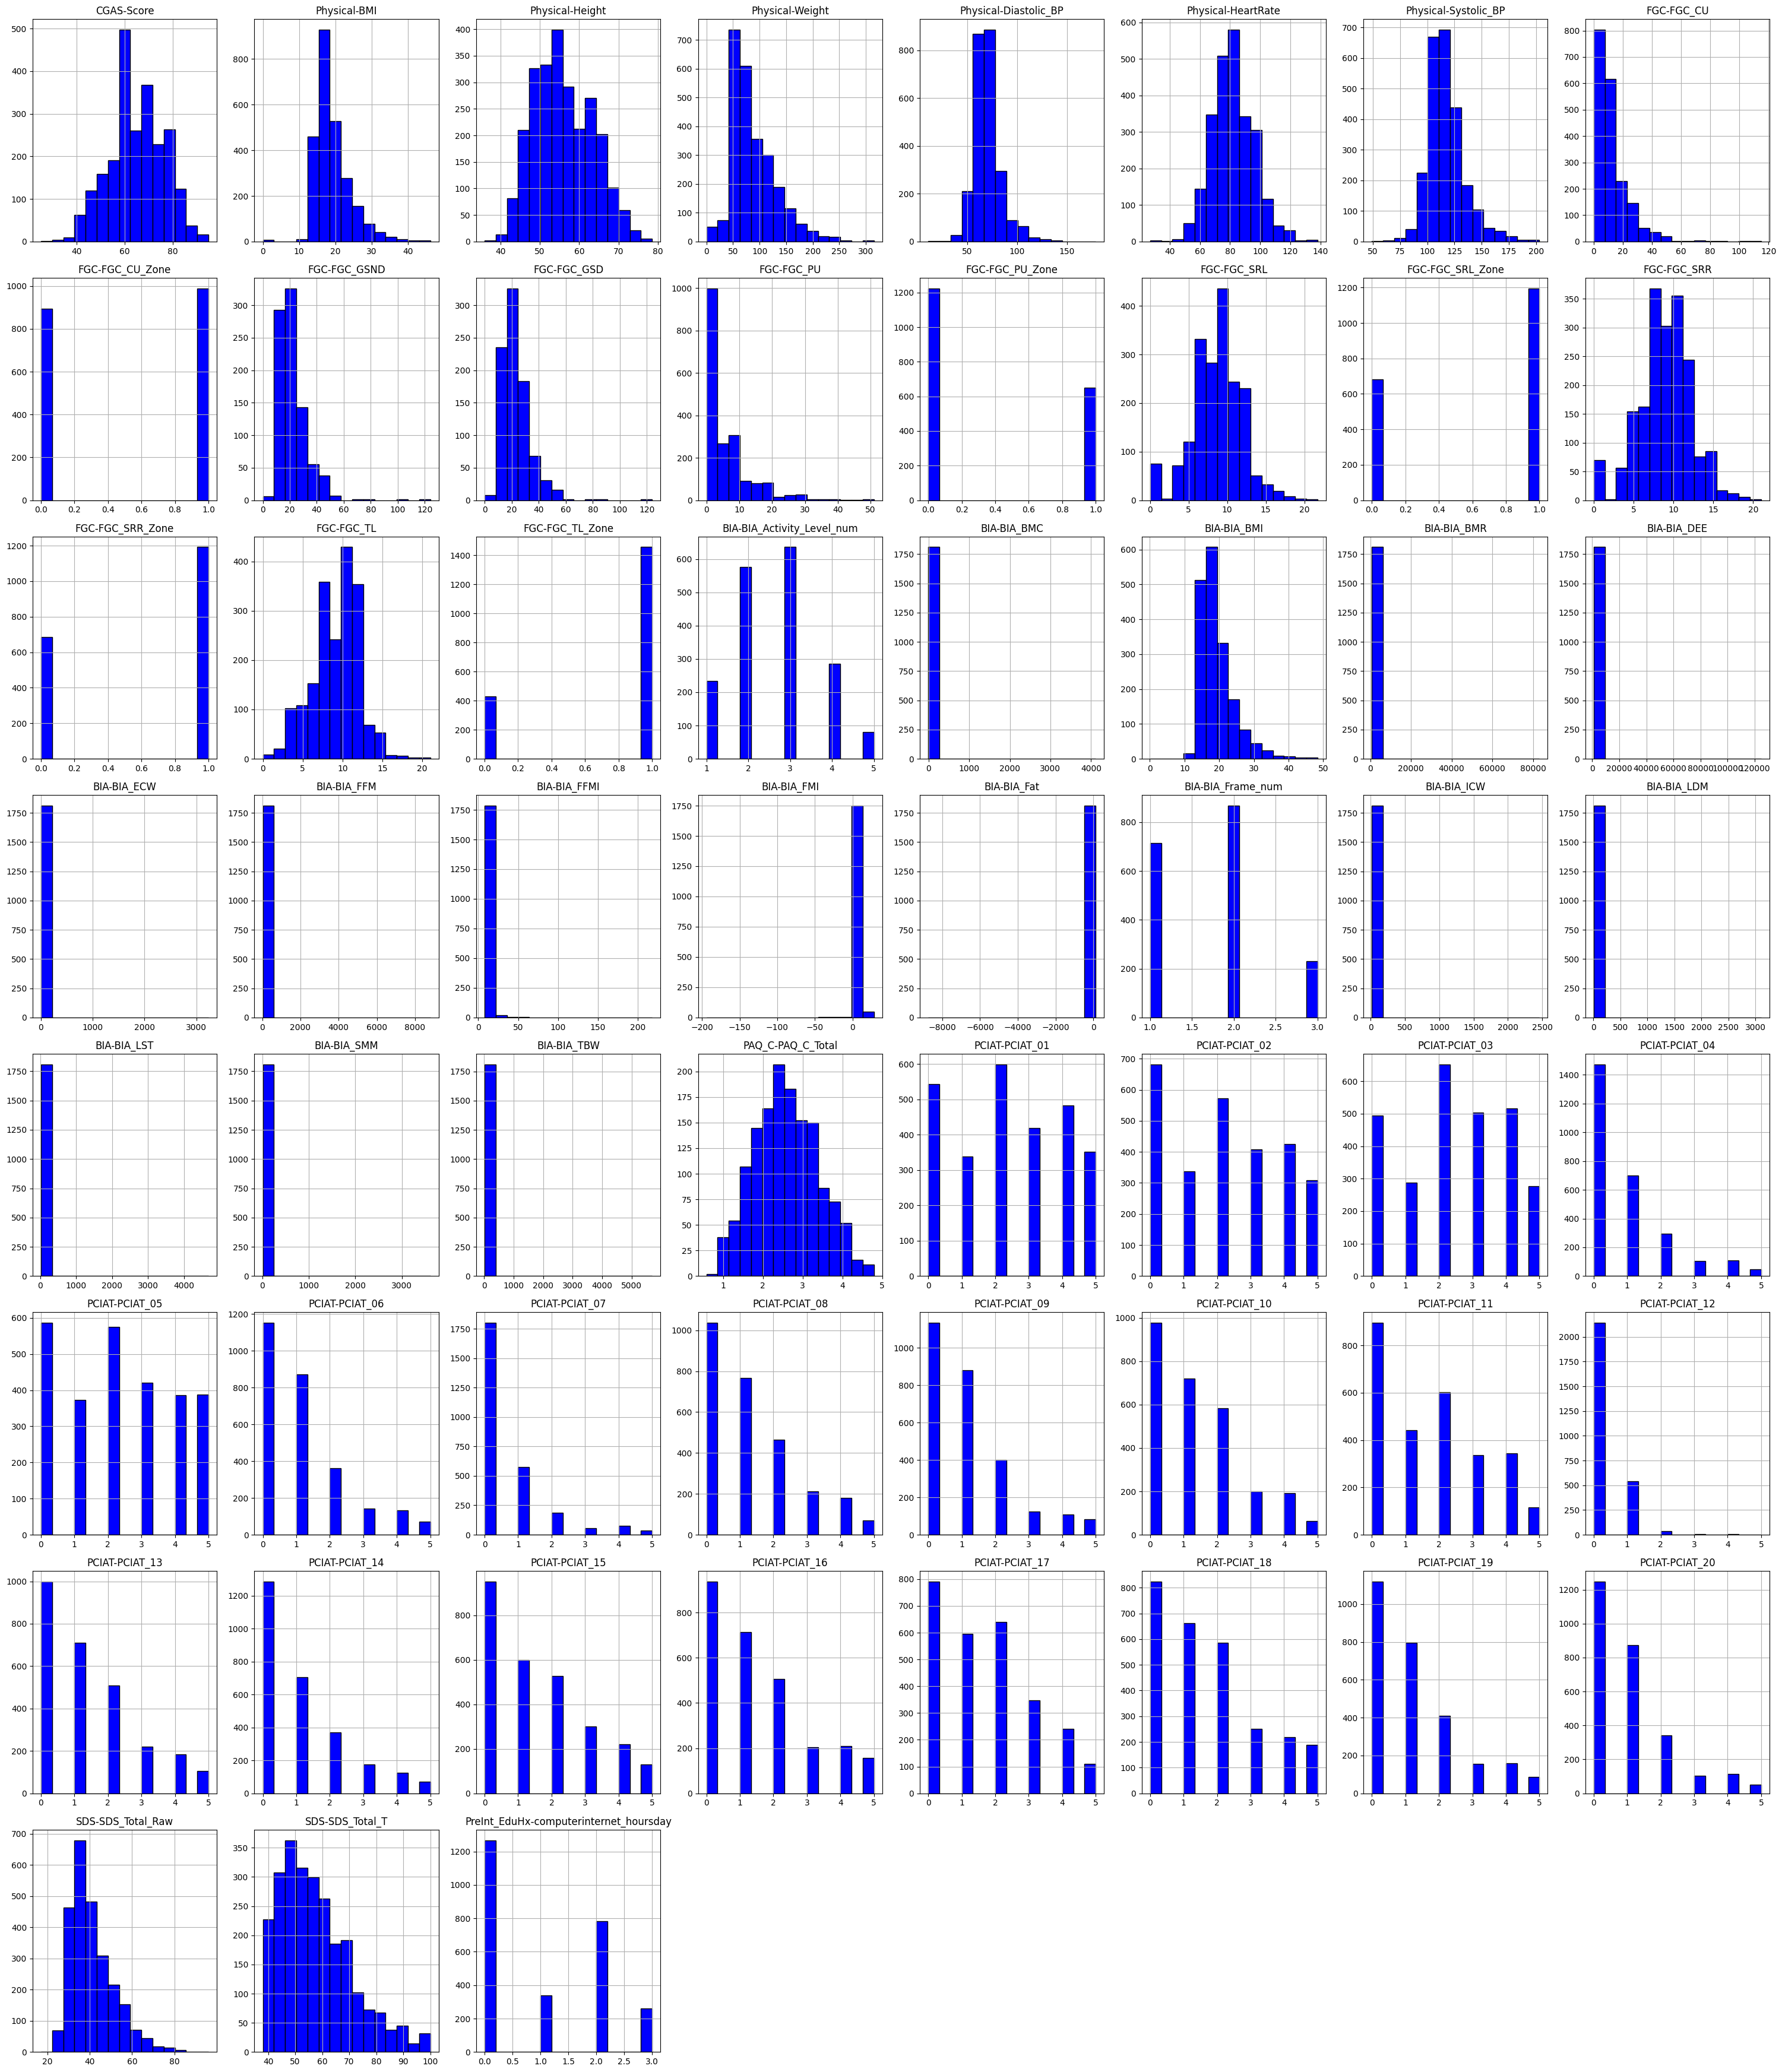


Percentage of missing values in columns:
FGC-FGC_GSD          68.165205
FGC-FGC_GSND         68.128655
FE-Season            53.947368
PAQ_C-PAQ_C_Total    47.368421
PAQ_C-Season         47.368421
                       ...    
PCIAT-PCIAT_10        0.109649
PCIAT-PCIAT_20        0.109649
PCIAT-PCIAT_01        0.109649
PCIAT-PCIAT_11        0.073099
PCIAT-PCIAT_02        0.073099
Length: 67, dtype: float64


In [ ]:
missing_columns = x.columns[x.isnull().sum() > 0]

x[missing_columns].hist(figsize=(30, 35), bins=15, color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

missing_percentage = (x[missing_columns].isnull().sum() / len(x)) * 100
print("\nPercentage of missing values in columns:")
print(missing_percentage.sort_values(ascending=False))

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  دسته بتدی ستون ها بر اساس نوع (عددی یا کتگوریکال) و درصد missing values (بیشتر از 30 یا کتر از 30)  جهت تصمیم گیری برای نحوه پر کردن missing values
</p>

In [ ]:
missing_values = x.isnull().sum()
missing_percentage = (missing_values / len(x)) * 100

# دسته‌بندی ستون‌ها
columns_numeric = x.select_dtypes(include=[np.number]).columns.tolist()
columns_categorical = x.select_dtypes(include=[object]).columns.tolist()

# دسته‌بندی ستون‌ها بر اساس درصد مفقود
columns_numeric_with_more_than_30_missing = [col for col in columns_numeric if missing_percentage[col] > 30]
columns_numeric_with_less_than_30_missing=[col for col in columns_numeric if 0 <missing_percentage[col] <= 30]
columns_categorical_with_more_than_30_missing = [col for col in columns_categorical if missing_percentage[col] > 30]
columns_categorical_with_less_than_30_missing=[col for col in columns_categorical if 0 <missing_percentage[col] <= 30]

print("\n1. ستون‌های عددی با درصد مفقود کمتر از 30%:")
print(columns_numeric_with_less_than_30_missing)

print("\n2. ستون‌های دسته‌بندی با درصد مفقود کمتر از 30%:")
print(columns_categorical_with_less_than_30_missing)

print("\n3. ستون‌های عددی با درصد مفقود بیشتر از 30% (برای استفاده از مدل‌ها یا پیش‌بینی):")
print(columns_numeric_with_more_than_30_missing)

print("\n4. ستون‌های دسته‌بندی با درصد مفقود بیشتر از 30% (برای استفاده از روش‌های پیچیده):")
print(columns_categorical_with_more_than_30_missing)


1. ستون‌های عددی با درصد مفقود کمتر از 30%:
['CGAS-Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU', 'FGC-FGC_TL', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday']

2. ستون‌های دسته‌بندی با درصد مفقود کمتر از 30%:
['CGAS-Season', 'Physical-Season', 'FGC-Season', 'SDS-Season', 'PreInt_EduHx-Season']

3. ستون‌های عددی با درصد مفقود بیشتر از 30% (برای استفاده از مدل‌ها یا پیش‌بینی):
['FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FG

In [ ]:
# فیلتر کردن ستون‌های عددی که مقادیر گمشده کمتر از 30% دارند
numeric_missing_columns = [col for col in columns_numeric_with_less_than_30_missing if x[col].isnull().sum() > 0]

# لیست‌های جداگانه برای ستون‌های نرمال، چولگی‌دار و خاص
normal_columns = []
skewed_columns = []
special_columns = []

# بررسی چولگی و تصمیم‌گیری فقط برای ستون‌های عددی با مقادیر گمشده
for col in numeric_missing_columns:
    skewness = x[col].skew()

    if x[col].nunique() <= 10:
        special_columns.append(col)
    elif abs(skewness) < 0.5:
        normal_columns.append(col)
    else:
        skewed_columns.append(col)


print("\nColumns categorized:")
print(f"Normal Columns: {normal_columns}")
print(f"Skewed Columns: {skewed_columns}")
print(f"Special Columns: {special_columns}")


Columns categorized:
Normal Columns: ['CGAS-Score', 'Physical-Height', 'Physical-HeartRate', 'FGC-FGC_TL']
Skewed Columns: ['Physical-BMI', 'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-Systolic_BP', 'FGC-FGC_CU', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']
Special Columns: ['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PreInt_EduHx-computerinternet_hoursday']


In [ ]:
# پر کردن ستون‌های نرمال با میانگین
for col in normal_columns:
    x[col] = x[col].fillna(x[col].mean())

# پر کردن ستون‌های چولگی‌دار با میانه
for col in skewed_columns:
    x[col] = x[col].fillna(x[col].median())

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
بررسی ستون های کلاس بندی و شناسایی ستون ها
</p>

In [ ]:
special_columns_categorical = [col for col in special_columns if x[col].nunique() <= 10]
special_columns_complex = [col for col in special_columns if col not in special_columns_categorical]
print(f"special_columns_categorical: {special_columns_categorical}")
print(f"special_columns_complex: {special_columns_complex}")

special_columns_categorical: ['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PreInt_EduHx-computerinternet_hoursday']
special_columns_complex: []


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
پر کردن missing values ستونهای کلاس بندی شده ای که کمتر از 30 درصد missing values دارند با استفاده از random-sampling
</p>

In [ ]:
for col in special_columns:

    # محاسبه توزیع مقادیر موجود
    value_counts = x[col].value_counts(normalize=True)

    # پیدا کردن ردیف‌های دارای مقدار گمشده
    missing_indices = x[x[col].isnull()].index

    # پر کردن مقادیر گمشده با نمونه‌گیری تصادفی
    x.loc[missing_indices, col] = np.random.choice(value_counts.index,
                                                      size=len(missing_indices),
                                                      p=value_counts.values)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  استفاده از KNNImputer برای پرکردن ستون هایی با بیشتر از 30% missing values
</p>

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
x[columns_numeric_with_more_than_30_missing] = knn_imputer.fit_transform(x[columns_numeric_with_more_than_30_missing])

In [ ]:
for col in columns_categorical_with_more_than_30_missing:
    x[col] = pd.Categorical(x[col]).codes

knn_imputer = KNNImputer(n_neighbors=5)

x[columns_categorical_with_more_than_30_missing] = knn_imputer.fit_transform(x[columns_categorical_with_more_than_30_missing])

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
پر کردن missing values ستونهای کلاس بندی شده ای که کمتر از 30 درصد missing values دارند و داده هایی از نوع object دارند با استفاده از random-sampling
</p>

In [ ]:
# پر کردن مقادیر گمشده با random sampling
for col in columns_categorical_with_less_than_30_missing:
    if col in x.columns:
        # پیدا کردن توزیع مقادیر موجود در ستون
        value_counts = x[col].value_counts(normalize=True)

        # شناسایی ایندکس مقادیر گمشده
        missing_indices = x[col][x[col].isnull()].index

        # پر کردن مقادیر گمشده به‌صورت تصادفی بر اساس توزیع مقادیر موجود
        x.loc[missing_indices, col] = np.random.choice(value_counts.index,
                                                          size=len(missing_indices),
                                                          p=value_counts.values)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅ تبدیل مقادیر ستون های غیر عددی به عددی با استفاده از LabelEncoder
</p>

In [ ]:
categorical_columns = ['CGAS-Season', 'Physical-Season', 'FGC-Season', 'PCIAT-Season',
                       'SDS-Season', 'PreInt_EduHx-Season','Enrol_Season']

# اعمال Label Encoding روی هر ستون
for col in categorical_columns:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

In [ ]:
# بررسی تعداد مقادیر گمشده باقی‌مانده در هر ستون
missing_values = x.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("\nColumns with missing values after filling:")
print(missing_columns)

if not missing_columns.empty:
    missing_percentage = (missing_columns / len(x)) * 100
    print("\nPercentage of missing values in remaining columns:")
    print(missing_percentage.sort_values(ascending=False))
else:
    print("\nNo missing values remain in the dataset.")


Columns with missing values after filling:
Series([], dtype: int64)

No missing values remain in the dataset.


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅ اطمینان از عددی بودن همه ستون ها
</p>

In [ ]:
# شناسایی ستون‌هایی که عددی نیستند
non_numeric_columns = x.select_dtypes(exclude=['number']).columns
print("Non-numeric columns in data:")
print(non_numeric_columns)

Non-numeric columns in data:
Index(['id'], dtype='object')


##▶ Feature Selection

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅ نمایش corrolation  ستون ها
</p>

Correlation with sii:
PCIAT-PCIAT_Total    0.899681
PCIAT-PCIAT_15       0.748760
PCIAT-PCIAT_18       0.729899
PCIAT-PCIAT_17       0.724866
PCIAT-PCIAT_05       0.720917
                       ...   
FGC-FGC_SRR_Zone    -0.068659
CGAS-Score          -0.078760
FE-Season           -0.097130
Sex                 -0.100148
FGC-FGC_SRL_Zone    -0.104378
Length: 73, dtype: float64


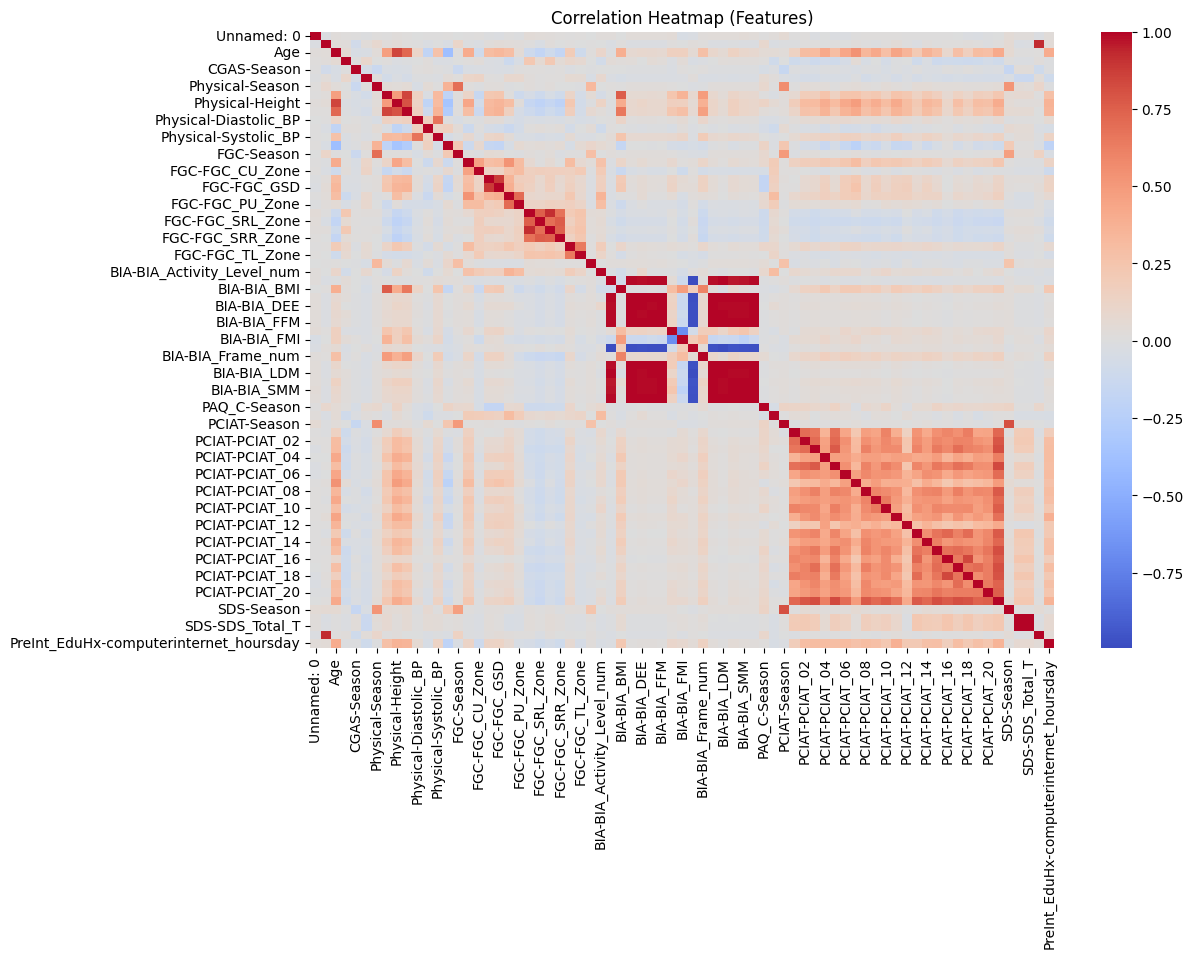

In [ ]:
id_column = x['id']

x_filtered = x.drop(columns=['id'])

# محاسبه همبستگی ستون‌های ویژگی با `sii`
correlation_with_target = x_filtered.corrwith(y)
print("Correlation with sii:")
print(correlation_with_target.sort_values(ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(x_filtered.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Features)")
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅ شناسایی جفت ستون هایی که corrolation بالایی دارن
</p>

In [ ]:
# محاسبه ماتریس همبستگی
correlation_matrix = x_filtered.corr()

# شناسایی جفت ویژگی‌هایی با همبستگی بالا
high_corr_pairs = []
threshold = 0.9
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            high_corr_pairs.append((col1, col2))

print("Highly correlated feature pairs:")
print(high_corr_pairs)

Highly correlated feature pairs:
[('Enrol_Season', 'PreInt_EduHx-Season'), ('FGC-FGC_SRL', 'FGC-FGC_SRR'), ('FGC-FGC_SRR', 'FGC-FGC_SRL'), ('BIA-BIA_BMC', 'BIA-BIA_BMR'), ('BIA-BIA_BMC', 'BIA-BIA_DEE'), ('BIA-BIA_BMC', 'BIA-BIA_ECW'), ('BIA-BIA_BMC', 'BIA-BIA_FFM'), ('BIA-BIA_BMC', 'BIA-BIA_Fat'), ('BIA-BIA_BMC', 'BIA-BIA_ICW'), ('BIA-BIA_BMC', 'BIA-BIA_LDM'), ('BIA-BIA_BMC', 'BIA-BIA_LST'), ('BIA-BIA_BMC', 'BIA-BIA_SMM'), ('BIA-BIA_BMC', 'BIA-BIA_TBW'), ('BIA-BIA_BMR', 'BIA-BIA_BMC'), ('BIA-BIA_BMR', 'BIA-BIA_DEE'), ('BIA-BIA_BMR', 'BIA-BIA_ECW'), ('BIA-BIA_BMR', 'BIA-BIA_FFM'), ('BIA-BIA_BMR', 'BIA-BIA_Fat'), ('BIA-BIA_BMR', 'BIA-BIA_ICW'), ('BIA-BIA_BMR', 'BIA-BIA_LDM'), ('BIA-BIA_BMR', 'BIA-BIA_LST'), ('BIA-BIA_BMR', 'BIA-BIA_SMM'), ('BIA-BIA_BMR', 'BIA-BIA_TBW'), ('BIA-BIA_DEE', 'BIA-BIA_BMC'), ('BIA-BIA_DEE', 'BIA-BIA_BMR'), ('BIA-BIA_DEE', 'BIA-BIA_ECW'), ('BIA-BIA_DEE', 'BIA-BIA_FFM'), ('BIA-BIA_DEE', 'BIA-BIA_Fat'), ('BIA-BIA_DEE', 'BIA-BIA_ICW'), ('BIA-BIA_DEE', 'BIA-BIA_LDM'

In [ ]:
# چاپ همبستگی ستون‌های همبسته با `sii`
print("Correlation of highly correlated columns with `sii`:")
for pair in high_corr_pairs:
    col1, col2 = pair
    print(f"{col1}: {correlation_with_target[col1]}, {col2}: {correlation_with_target[col2]}")

Correlation of highly correlated columns with `sii`:
Enrol_Season: 0.0214635686985724, PreInt_EduHx-Season: 0.019407708412101765
FGC-FGC_SRL: -0.053158500194660264, FGC-FGC_SRR: -0.042364245401828725
FGC-FGC_SRR: -0.042364245401828725, FGC-FGC_SRL: -0.053158500194660264
BIA-BIA_BMC: -0.01418293298161884, BIA-BIA_BMR: 0.01866497131707346
BIA-BIA_BMC: -0.01418293298161884, BIA-BIA_DEE: 0.029779926944418767
BIA-BIA_BMC: -0.01418293298161884, BIA-BIA_ECW: 0.017632847047868487
BIA-BIA_BMC: -0.01418293298161884, BIA-BIA_FFM: 0.0186649253566982
BIA-BIA_BMC: -0.01418293298161884, BIA-BIA_Fat: 0.03578807129819372
BIA-BIA_BMC: -0.01418293298161884, BIA-BIA_ICW: 0.030209093597476675
BIA-BIA_BMC: -0.01418293298161884, BIA-BIA_LDM: 0.010433108464810223
BIA-BIA_BMC: -0.01418293298161884, BIA-BIA_LST: 0.04647458602980103
BIA-BIA_BMC: -0.01418293298161884, BIA-BIA_SMM: 0.03012652242492913
BIA-BIA_BMC: -0.01418293298161884, BIA-BIA_TBW: 0.023119597980844057
BIA-BIA_BMR: 0.01866497131707346, BIA-BIA_BMC

In [ ]:
# لیست ستون‌هایی که باید حذف شوند
columns_to_drop = []

for col1, col2 in high_corr_pairs:
    if correlation_with_target[col1] > correlation_with_target[col2]:
        columns_to_drop.append(col2)
    else:
        columns_to_drop.append(col1)

print(f"Columns dropped due to high correlation: {columns_to_drop}")

Columns dropped due to high correlation: ['PreInt_EduHx-Season', 'FGC-FGC_SRL', 'FGC-FGC_SRL', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_BMR', 'BIA-BIA_BMR', 'BIA-BIA_LDM', 'BIA-BIA_BMR', 'BIA-BIA_BMR', 'BIA-BIA_BMR', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_DEE', 'BIA-BIA_DEE', 'BIA-BIA_LDM', 'BIA-BIA_DEE', 'BIA-BIA_DEE', 'BIA-BIA_TBW', 'BIA-BIA_BMC', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_LDM', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_BMC', 'BIA-BIA_FFM', 'BIA-BIA_FFM', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFM', 'BIA-BIA_LDM', 'BIA-BIA_FFM', 'BIA-BIA_FFM', 'BIA-BIA_FFM', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_Fat', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'BIA-

In [ ]:
print(len(x_filtered.columns))

73


In [ ]:
# حذف ستون‌های انتخاب‌ شده
columns_to_drop = list(set(columns_to_drop))  # حذف تکراری‌ها
x_filtered = x_filtered.drop(columns=columns_to_drop)

In [ ]:
print(len(x_filtered.columns))

60


In [ ]:
x_filtered['id'] = id_column

In [ ]:
x_filtered['sii'] = y

In [ ]:
x_filtered

,Unnamed: 0,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,id,sii
0,0,0,5,0,3,51.000000,0,16.877316,46.0,50.8,...,4.0,4.0,2.0,4.0,55.0,0,55.0,3.0,00008ff9,2.0
1,1,2,9,0,2,65.159266,0,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0,64.0,0.0,000fd460,0.0
2,2,2,10,1,0,71.000000,0,16.648696,56.5,75.6,...,2.0,2.0,1.0,1.0,28.0,0,54.0,2.0,00105258,0.0
3,3,3,9,0,0,71.000000,2,18.292347,56.0,81.6,...,4.0,3.0,4.0,1.0,44.0,2,45.0,0.0,00115b9f,1.0
5,5,1,13,1,3,50.000000,2,22.279952,59.5,112.2,...,3.0,1.0,2.0,1.0,34.0,2,56.0,0.0,001f3379,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3953,0,8,0,0,65.159266,0,17.139810,52.5,67.2,...,0.0,2.0,2.0,1.0,22.0,0,58.0,2.0,ff6c2bb8,0.0
3954,3954,2,7,1,3,65.159266,2,13.927006,48.5,46.6,...,3.0,3.0,3.0,0.0,33.0,2,67.0,0.0,ff759544,1.0
3955,3955,0,13,0,1,60.000000,0,16.362460,59.5,82.4,...,2.0,1.0,1.0,0.0,32.0,3,50.0,1.0,ff8a2de4,1.0
3957,3957,0,11,0,1,68.000000,3,21.441500,60.0,109.8,...,1.0,1.0,0.0,1.0,31.0,3,77.0,0.0,ffcd4dbd,1.0


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅ ساخت feature جدید با استفاده از ستون های PCIAT
</p>

In [ ]:
pciat_columns = ['PCIAT-PCIAT_01','PCIAT-PCIAT_02','PCIAT-PCIAT_03','PCIAT-PCIAT_04',
                          'PCIAT-PCIAT_05','PCIAT-PCIAT_06','PCIAT-PCIAT_07','PCIAT-PCIAT_08',
                          'PCIAT-PCIAT_09','PCIAT-PCIAT_10','PCIAT-PCIAT_11','PCIAT-PCIAT_12',
                          'PCIAT-PCIAT_13','PCIAT-PCIAT_14','PCIAT-PCIAT_15','PCIAT-PCIAT_16',
                          'PCIAT-PCIAT_17','PCIAT-PCIAT_18','PCIAT-PCIAT_19','PCIAT-PCIAT_20']
# ایجاد ویژگی‌های جدید
x_filtered['PCIAT_Sum'] = x_filtered[pciat_columns].sum(axis=1)
x_filtered['PCIAT_Mean'] = x_filtered[pciat_columns].mean(axis=1)
x_filtered['PCIAT_Variance'] = x_filtered[pciat_columns].var(axis=1)
x_filtered['PCIAT_Max'] = x_filtered[pciat_columns].max(axis=1)
x_filtered['PCIAT_Min'] = x_filtered[pciat_columns].min(axis=1)
x_filtered['PCIAT_HighScores'] = (x_filtered[pciat_columns] > 4).sum(axis=1)
x_filtered['PCIAT_LowScores'] = (x_filtered[pciat_columns] < 2).sum(axis=1)
x_filtered['PCIAT_StdDev'] = x_filtered[pciat_columns].std(axis=1)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
محاسبه corrolation ستون های جدید با sii جهت تصمیم گیری در حذف یا نگه داشتن آن ها
</p>

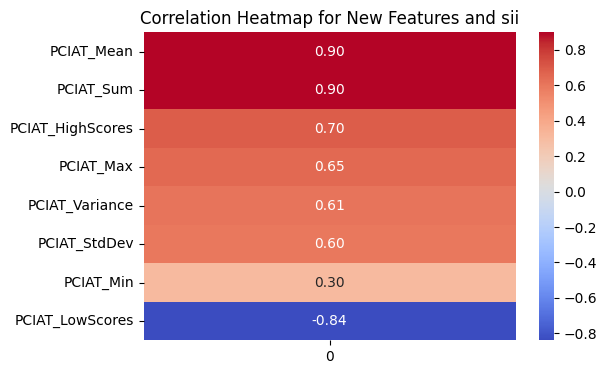

In [ ]:
# محاسبه همبستگی ستون‌های جدید با sii
new_columns = ['PCIAT_Sum', 'PCIAT_Mean', 'PCIAT_Variance', 'PCIAT_Max', 'PCIAT_Min',
               'PCIAT_HighScores','PCIAT_LowScores','PCIAT_StdDev']
correlation_with_sii = x_filtered[new_columns].corrwith(y)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_with_sii.sort_values(ascending=False).to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap for New Features and sii")
plt.show()

In [ ]:
x_filtered = x_filtered.drop(columns=['PCIAT_LowScores', 'PCIAT_Min','PCIAT_Sum', 'PCIAT_Mean'])

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅ حذف ستون ها PCIAT
</p>

In [ ]:
x_filtered = x_filtered.drop(columns=['PCIAT-PCIAT_01','PCIAT-PCIAT_02','PCIAT-PCIAT_03','PCIAT-PCIAT_04',
                          'PCIAT-PCIAT_05','PCIAT-PCIAT_06','PCIAT-PCIAT_07','PCIAT-PCIAT_08',
                          'PCIAT-PCIAT_09','PCIAT-PCIAT_10','PCIAT-PCIAT_11','PCIAT-PCIAT_12',
                          'PCIAT-PCIAT_13','PCIAT-PCIAT_14','PCIAT-PCIAT_15','PCIAT-PCIAT_16',
                          'PCIAT-PCIAT_17','PCIAT-PCIAT_18','PCIAT-PCIAT_19','PCIAT-PCIAT_20','PCIAT-PCIAT_Total'])

In [ ]:
print(len(x_filtered.columns))

45


##▶ Outlier

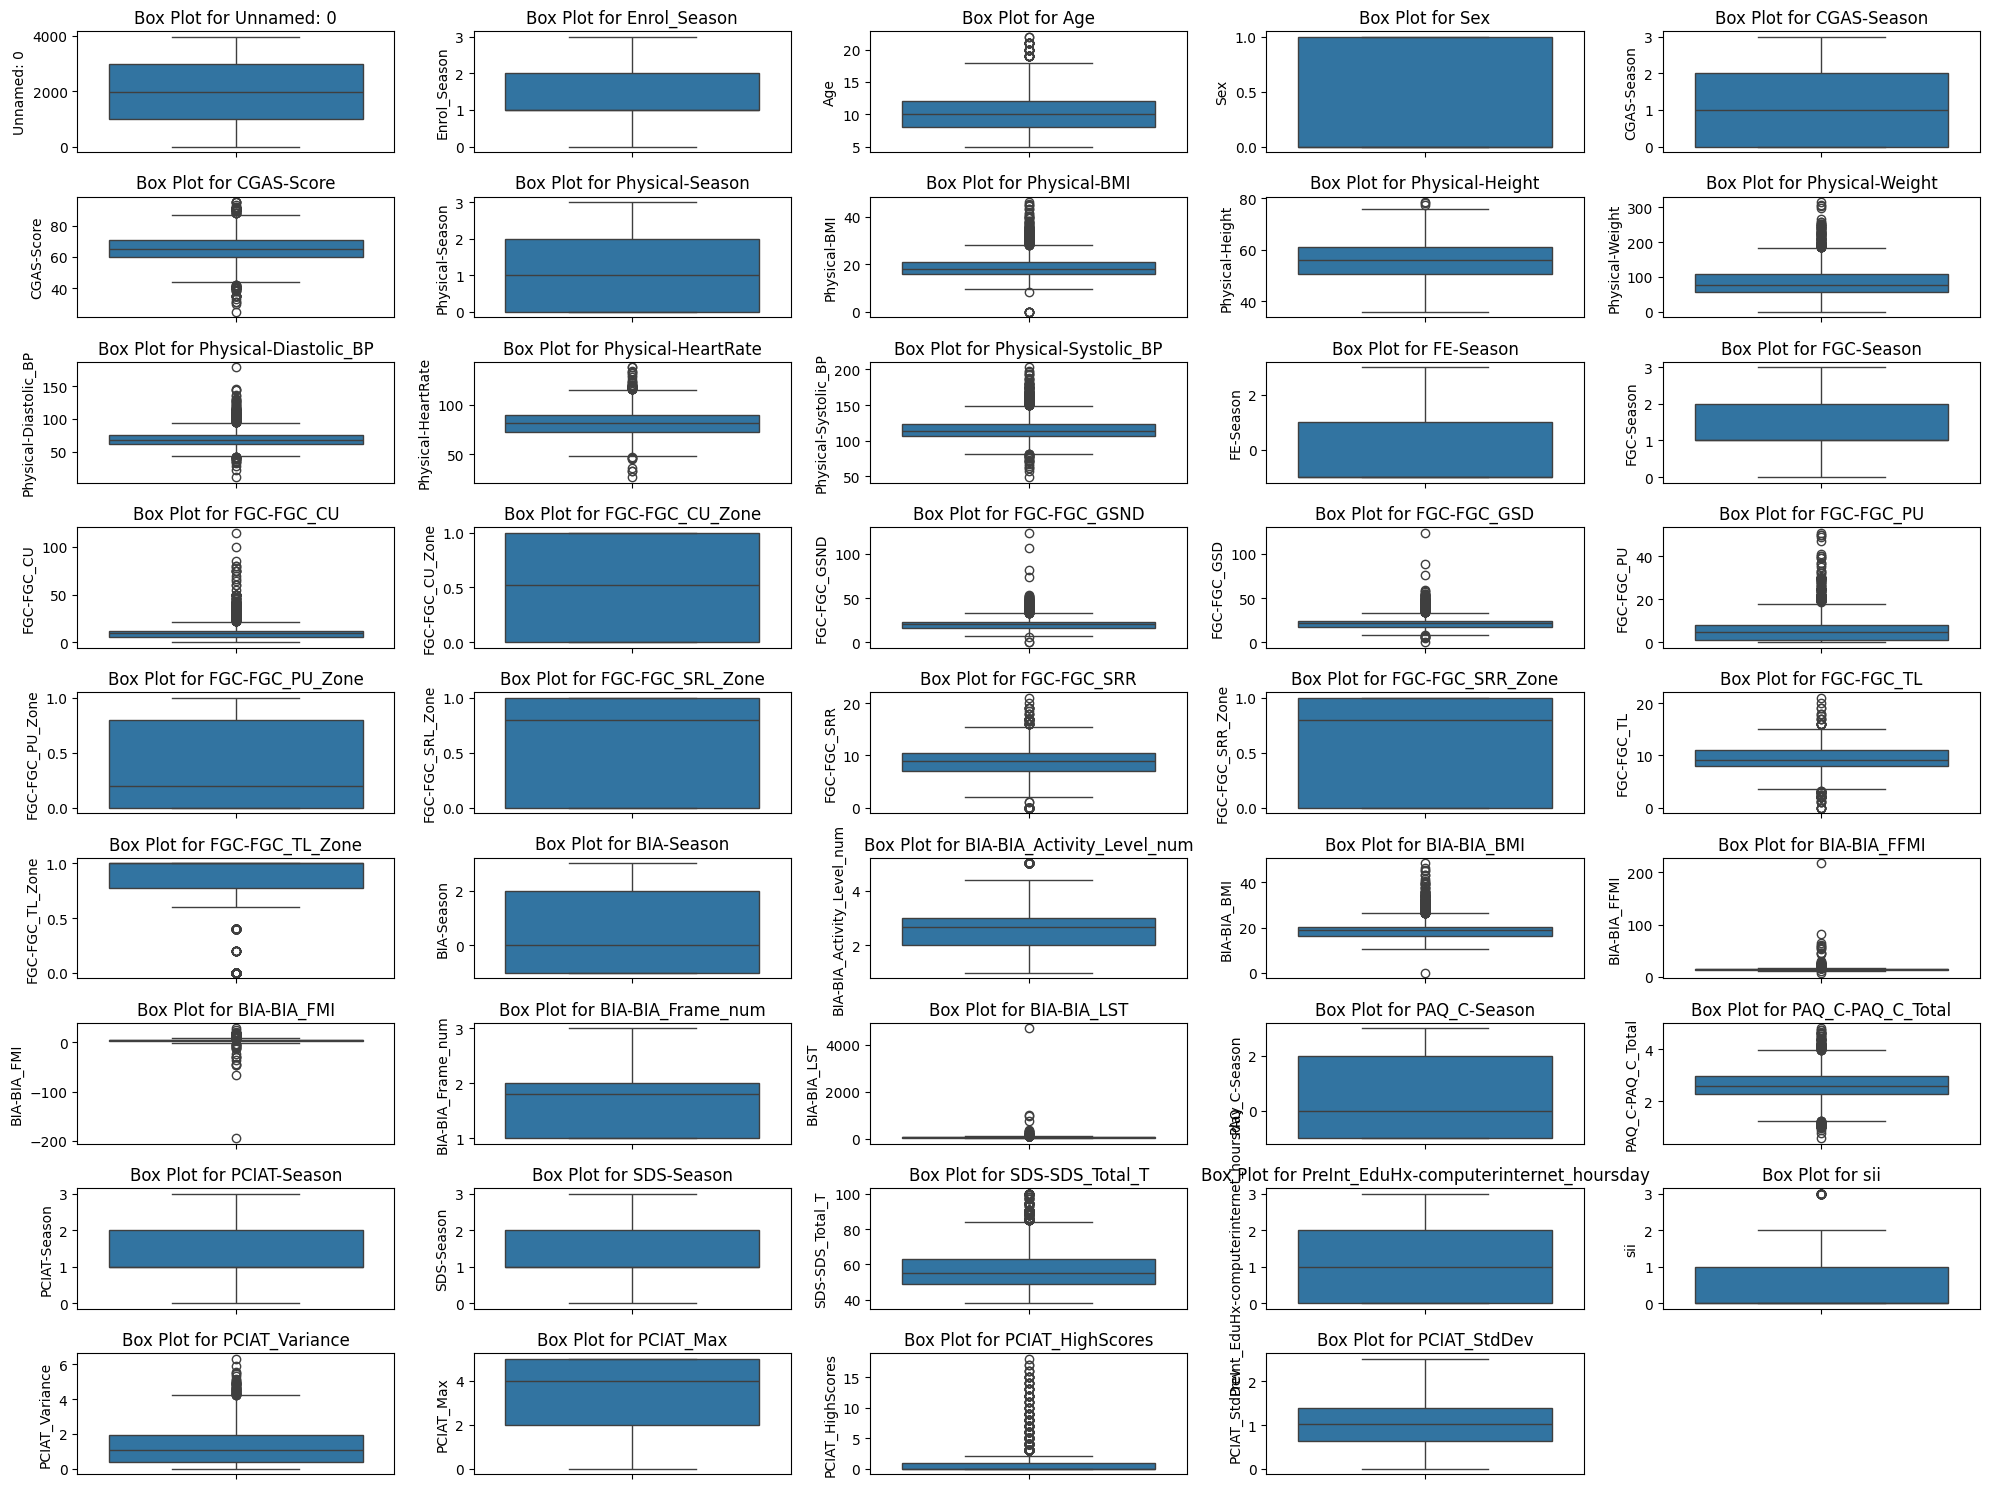

In [ ]:
numeric_columns = x_filtered.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) // 5) + 1, 5, i)
    sns.boxplot(y=x_filtered[col])
    plt.title(f"Box Plot for {col}")

plt.tight_layout()
plt.show()

In [ ]:
id_column = x_filtered['id']

# حذف موقت ستون id از DataFrame
x_filtered = x_filtered.drop(columns=['id'])

In [ ]:
numeric_columns = [col for col in x_filtered.select_dtypes(include=['number']).columns if col != 'sii']
# دسته‌بندی ستون‌های عددی به نرمال یا چوله
normal_columns = [col for col in numeric_columns if abs(x_filtered[col].skew()) < 0.5]
skewed_columns = [col for col in numeric_columns if abs(x_filtered[col].skew()) >= 0.5]

print("Normal columns:", normal_columns)
print("Skewed columns:", skewed_columns)

# مدیریت داده‌های پرت برای ستون‌های نرمال
for col in normal_columns:
    print(f"Processing normal column: {col}")
    z_scores = zscore(x_filtered[col])
    outliers = (z_scores < -3) | (z_scores > 3)
    print(f"Outliers detected in {col}: {outliers.sum()}")
    # جایگزینی داده‌های پرت با میانگین
    x_filtered.loc[outliers, col] = x_filtered[col].mean()

# مدیریت داده‌های پرت برای ستون‌های چوله
for col in skewed_columns:
    print(f"Processing skewed column: {col}")
    Q1 = x_filtered[col].quantile(0.25)
    Q3 = x_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (x_filtered[col] < lower_bound) | (x_filtered[col] > upper_bound)
    print(f"Outliers detected in {col}: {outliers.sum()}")
    # جایگزینی داده‌های پرت با میانه
    x_filtered.loc[outliers, col] = x_filtered[col].median()

Normal columns: ['Unnamed: 0', 'Enrol_Season', 'CGAS-Season', 'CGAS-Score', 'Physical-Season', 'Physical-Height', 'Physical-HeartRate', 'FGC-Season', 'FGC-FGC_CU_Zone', 'FGC-FGC_SRR', 'FGC-FGC_TL', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_Frame_num', 'PAQ_C-PAQ_C_Total', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-computerinternet_hoursday', 'PCIAT_StdDev']
Skewed columns: ['Age', 'Sex', 'Physical-BMI', 'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-Systolic_BP', 'FE-Season', 'FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_BMI', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_LST', 'PAQ_C-Season', 'SDS-SDS_Total_T', 'PCIAT_Variance', 'PCIAT_Max', 'PCIAT_HighScores']
Processing normal column: Unnamed: 0
Outliers detected in Unnamed: 0: 0
Processing normal column: Enrol_Season
Outliers detected in Enrol_Season: 0
Processing normal column: CGAS-Season
Outliers detected in CGAS-Seas

<ipython-input-101-a4f20d4f2c9e>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1979.8859649122808' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_filtered.loc[outliers, col] = x_filtered[col].mean()
<ipython-input-101-a4f20d4f2c9e>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.4846491228070176' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_filtered.loc[outliers, col] = x_filtered[col].mean()
<ipython-input-101-a4f20d4f2c9e>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.4462719298245614' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_filtered.loc[outliers, col] = x_filtered[col].mean()
<ipython-i

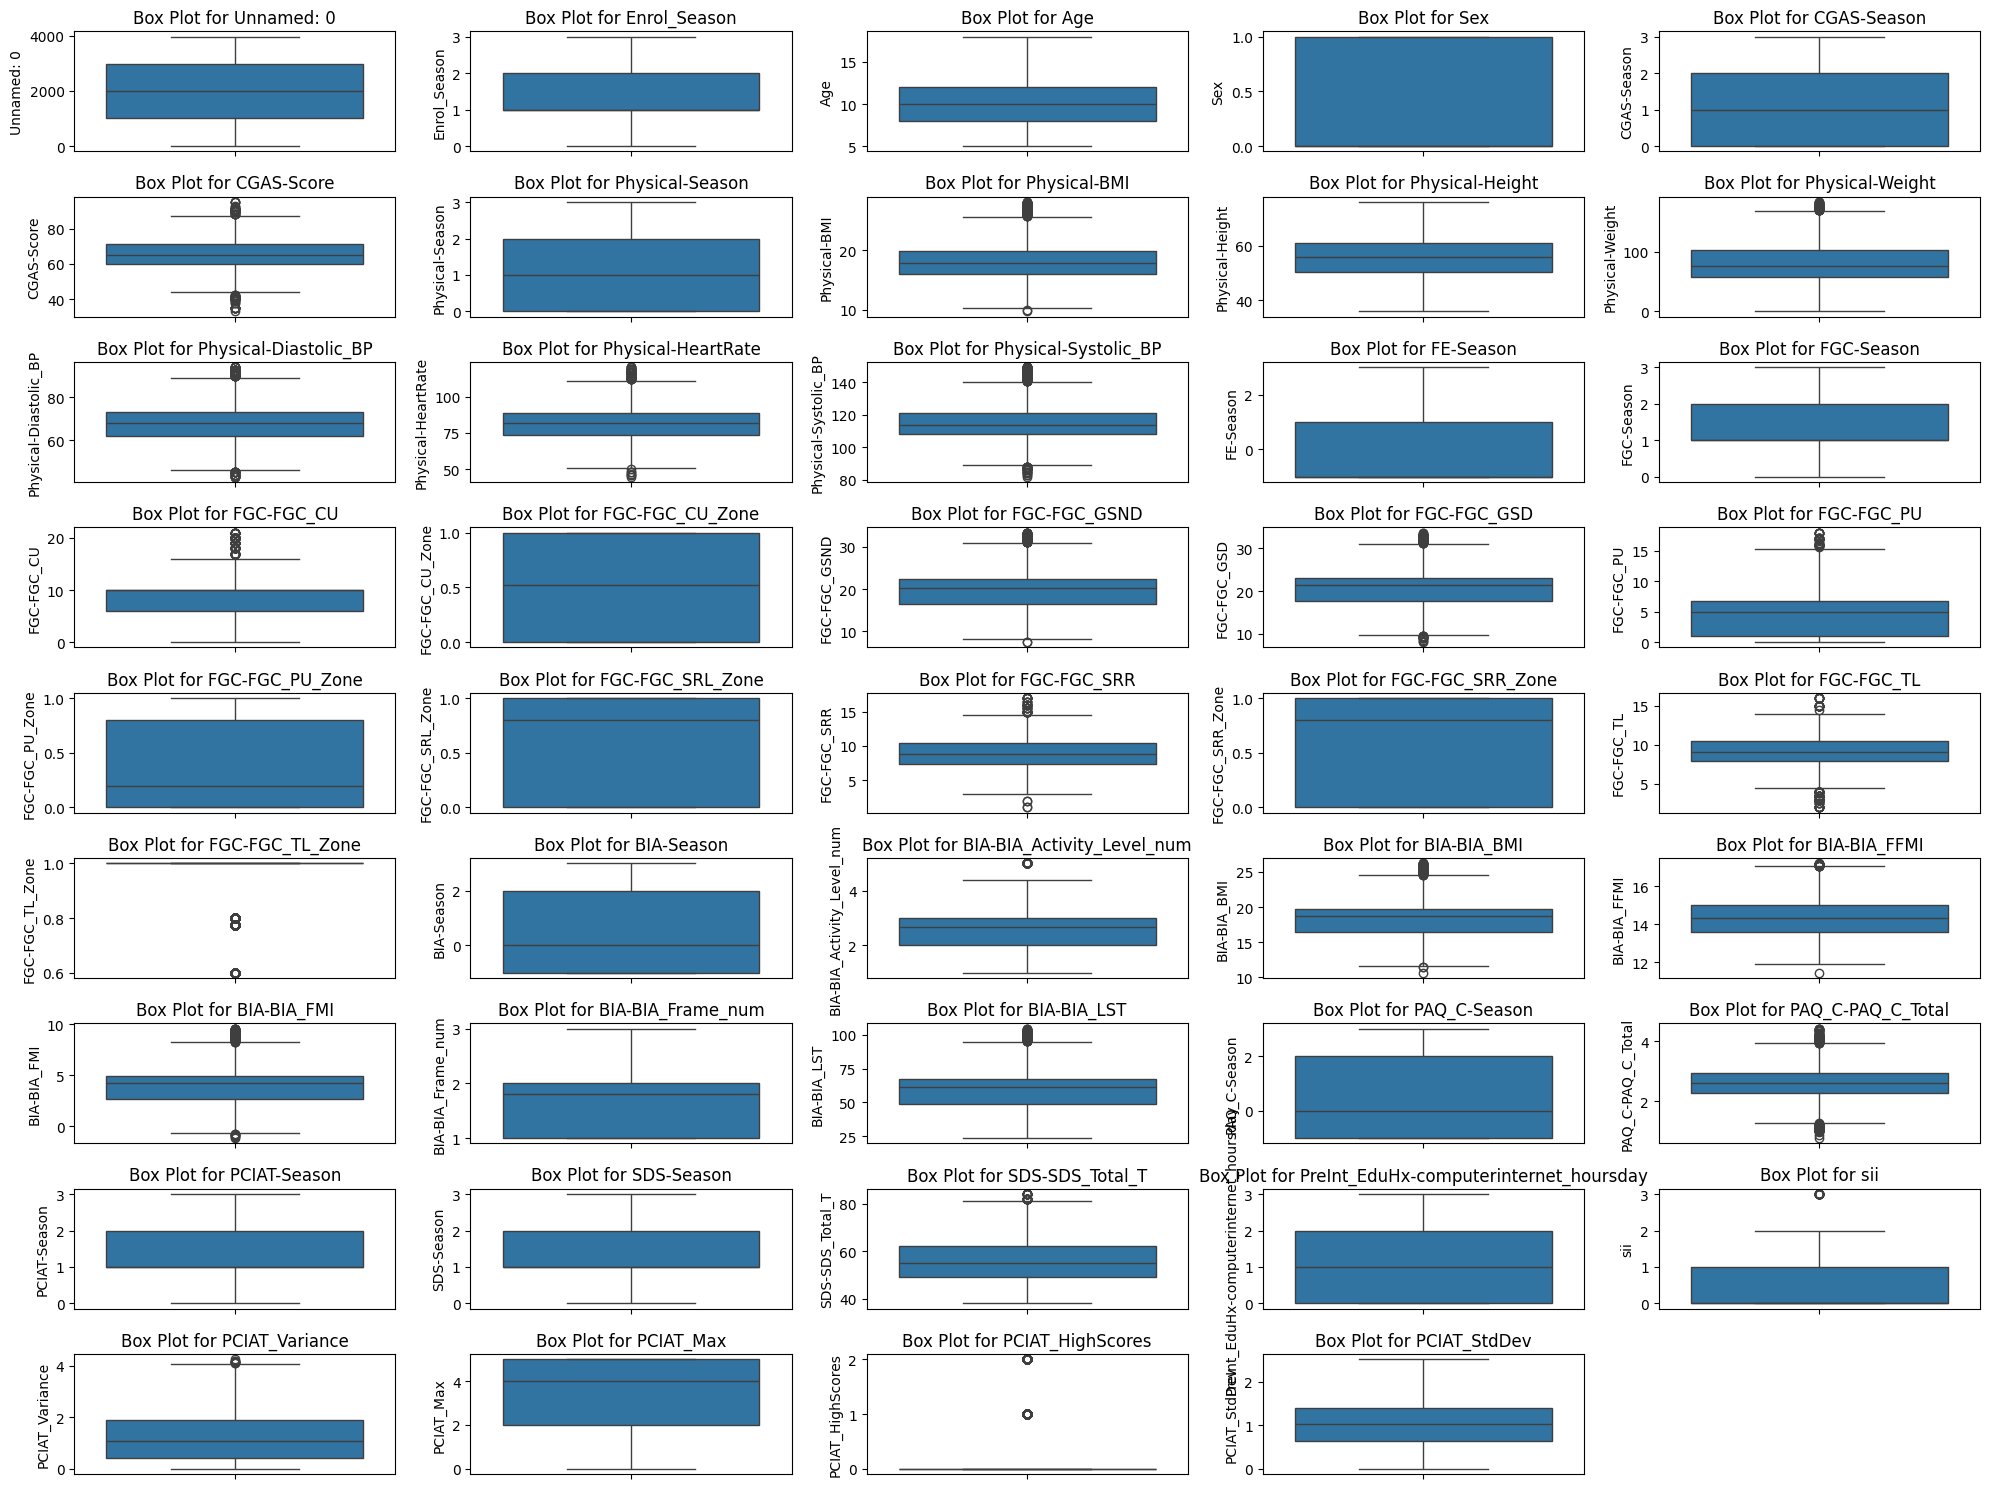

In [ ]:
numeric_columns = x_filtered.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) // 5) + 1, 5, i)
    sns.boxplot(y=x_filtered[col])
    plt.title(f"Box Plot for {col}")

plt.tight_layout()
plt.show()

In [ ]:
x = x_filtered.drop(columns=['sii'])
y = x_filtered['sii']

#feature selection

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  ویژگی‌هایی با کمترین تاثیر بر عملکرد مدل
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
با استفاده از الگوریتم‌هایی مانند Random Forest، می‌توانیم اهمیت ویژگی‌ها (Feature Importance) را محاسبه کنیم و ویژگی‌هایی که کمترین تاثیر را دارند حذف کنیم.
</p>

                                   Feature  Importance
40                               PCIAT_Max    0.156770
42                            PCIAT_StdDev    0.107088
39                          PCIAT_Variance    0.089426
8                          Physical-Height    0.034605
2                                      Age    0.032619
9                          Physical-Weight    0.030787
41                        PCIAT_HighScores    0.028057
32                             BIA-BIA_LST    0.027535
37                         SDS-SDS_Total_T    0.025963
0                               Unnamed: 0    0.024826
7                             Physical-BMI    0.022848
17                            FGC-FGC_GSND    0.022148
18                             FGC-FGC_GSD    0.022063
34                       PAQ_C-PAQ_C_Total    0.022041
11                      Physical-HeartRate    0.020964
28                             BIA-BIA_BMI    0.020921
30                             BIA-BIA_FMI    0.020771
12        

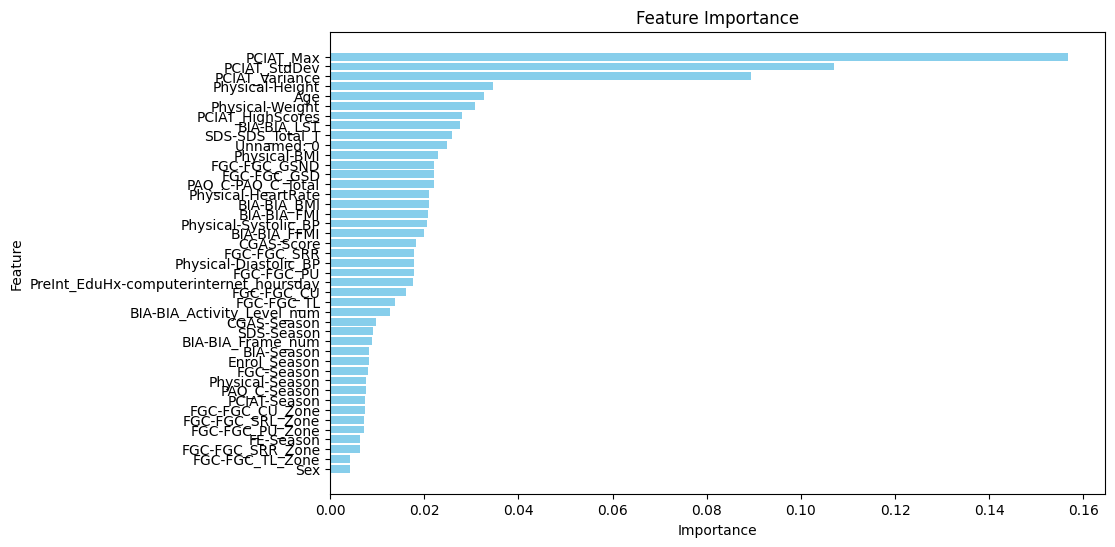

In [ ]:
# تعریف مدل Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

# محاسبه اهمیت ویژگی‌ها
feature_importances = model.feature_importances_

# ایجاد دیتافریم برای نمایش اهمیت ویژگی‌ها
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# نمایش جدول
print(importance_df)

# رسم نمودار اهمیت ویژگی‌ها
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # معکوس کردن ترتیب برای نمایش صحیح
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
x.shape

(2736, 43)

In [ ]:
x['sii']=y
x['id']=id_column

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  دخیره سازی دیتاست پیش پردازش شده HBN برای ادامه کار
</p>

In [ ]:
x.to_csv('/content/drive/My Drive/bootcamp_project/hbn_dataset_final.csv', index=False)
print("Dataset has been saved to Google Drive!")

Dataset has been saved to Google Drive!
